<a href="https://colab.research.google.com/github/xb1g/chatasci/blob/main/chatasci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matcha Ecommerce data analysis
- high value crops
## Goals
- clustering to make a product for each top cluster
- see

In [1]:
# prompt: import data from https://github.com/xb1g/chatasci/blob/main/Shopee%20Product%202.csv, remove web-scraper-start-url, web-scraper-order	web-scraper-start-url

!pip install pythainlp

import pandas as pd

# Download the CSV file
!wget https://raw.githubusercontent.com/xb1g/chatasci/main/Shopee%20Product%202.csv

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Shopee Product 2.csv')

# Remove the specified columns
columns_to_remove = ['web-scraper-start-url', 'web-scraper-order']
df = df.drop(columns=columns_to_remove, errors='ignore')

# Display the updated DataFrame (optional)
print(df.head())

# Save the updated DataFrame to a new CSV file (optional)
df.to_csv('cleaned_shopee_data.csv', index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 14.8 MB/s eta 0:00:00
--2024-12-08 13:37:59--  https://raw.githubusercontent.com/xb1g/chatasci/main/Shopee%20Product%202.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1626095 (1.5M) [text/plain]
Saving to: ‘Shopee Product 2.csv’

Shopee Product 2.cs 100%[===================>]   1.55M  --.-KB/s    in 0.1s    

2024-12-08 13:37:59 (15.6 MB/s) - ‘Shopee Product 2.csv’ saved [1626095/1626095]

                                        product_name price_range ratings  \
0  [แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...        ฿870     274   
1  [แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...        ฿870     274   
2  คาวามิ อูจิมัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI...        ฿209      47   
3  คาวาม

In [2]:
# prompt: table df

df


,product_name,price_range,ratings,sold,favorite,shop_name,points,product_count,reply_rates,age,followers,reply_speed,specific_data,description,reviews,price,option,review_text,imgs,imgs-srcset
0,[แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...,฿870,274,1.8พัน,Favorite (231),Panda-teas,27.3พัน,24,87%,8 ปี ที่ผ่านมา,5.9พัน,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,รายละเอียดสินค้า[แพนด้าที] ผงชาเขียวมัทฉะ 100%...,ทั้งหมด5 ดาว (269)4 ดาว (3)3 ดาว (1)2 ดาว (1)1...,NaN,NaN,"[{""review_text"":""กลิ่น: หอมรสชาติ: ดีผงชาเขียว...","[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
1,[แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...,฿870,274,1.8พัน,Favorite (231),Panda-teas,27.3พัน,24,87%,8 ปี ที่ผ่านมา,5.9พัน,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,฿870,[],NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
2,คาวามิ อูจิมัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI...,฿209,47,232,Favorite (27),COFFEE_TEA_SUPPLY จรัญ13,18.7พัน,238,96%,3 ปี ที่ผ่านมา,2.6พัน,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,รายละเอียดสินค้าคาวามิ อูจิมัทฉะ ชนิดผง 100% ข...,ทั้งหมด5 ดาว (47)4 ดาว (0)3 ดาว (0)2 ดาว (0)1 ...,NaN,NaN,"[{""review_text"":""ทางร้านจัดส่งไวมากค่ะ แพคมาดี...","[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
3,คาวามิ อูจิมัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI...,฿209,47,232,Favorite (27),COFFEE_TEA_SUPPLY จรัญ13,18.7พัน,238,96%,3 ปี ที่ผ่านมา,2.6พัน,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,฿209,[],NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
4,📣🔥ชาเขียวมัทฉะ 100 กรัม มัทฉะแท้ 100% ผงมัทฉะ ...,฿44,622,2พัน,Favorite (206),ThaiHengfa,6.7พัน,63,80%,4 ปี ที่ผ่านมา,861,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,รายละเอียดสินค้า ผงชาเชียว **แพคเกจใหม่**\nข...,ทั้งหมด5 ดาว (549)4 ดาว (53)3 ดาว (14)2 ดาว (2...,NaN,NaN,"[{""review_text"":""รสชาติ: ดีกลิ่น: ดีสินค้าดี ร...","[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,มีใจให้มัทฉะ 真心 รวมผงมัทฉะเกรดพรีเมียม ไร่ชารา...,฿855,461,1.6พัน,Favorite (830),Magokoro Tea (มีใจให้มัทฉะ),1.3พัน,19,88%,5 ปี ที่ผ่านมา,2.4พัน,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,฿380,"[{""option"":""Hojicha Powder""},{""option"":""40 g.""}]",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
217,มีใจให้มัทฉะ 真心 รวมผงมัทฉะเกรดพรีเมียม ไร่ชารา...,฿855,461,1.6พัน,Favorite (830),Magokoro Tea (มีใจให้มัทฉะ),1.3พัน,19,88%,5 ปี ที่ผ่านมา,2.4พัน,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,฿855,"[{""option"":""Hojicha Powder""},{""option"":""100 g.""}]",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
218,Marukyu Koyamaen Aoarashi ผงมัทฉะเกรดพิธีระดับ...,"฿1,290",26,75,Favorite (166),alaia.tea,757,131,96%,9 ปี ที่ผ่านมา,2.1พัน,ภายในไม่กี่นาที,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,รายละเอียดสินค้าสัมผัสประสบการณ์ชาเขียวที่แตกต...,ทั้งหมด5 ดาว (25)4 ดาว (0)3 ดาว (1)2 ดาว (0)1 ...,NaN,NaN,"[{""review_text"":""ขอบคุณสำหรับขนมที่แถบแนบมาให้...","[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
219,Marukyu Koyamaen Aoarashi ผงมัทฉะเกรดพิธีระดับ...,"฿1,290",26,75,Favorite (166),alaia.tea,757,131,96%,9 ปี ที่ผ่านมา,2.1พัน,ภายในไม่กี่นาที,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,"฿1,290","[{""option"":""ถุง 100 g""}]",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN


thai nlp, nominal scale, ordinal rating, encode, do ml, location, stars, positive/negative about x in review, product, price, delivery,

In [3]:
# prompt: find out which columns has numbers and should be convert into numbers, such as columns with "พัน", "หมื่น", and convert them correctly like *1000,  *10000, only keep number in col favorite, make reply_rates from x% into .x, remove ฿ from price and price_range

import pandas as pd
import re

# Download the CSV file (if not already downloaded)
# !wget https://raw.githubusercontent.com/xb1g/chatasci/main/Shopee%20Product%202.csv

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Shopee Product 2.csv')

# Remove the specified columns
columns_to_remove = ['web-scraper-start-url', 'web-scraper-order']
df = df.drop(columns=columns_to_remove, errors='ignore')


def convert_thai_number(text):
    if isinstance(text, str):
        text = text.replace(',', '') #remove comma
        if "พัน" in text:
            try:
                num = float(text.replace("พัน", "")) * 1000
                return num
            except ValueError:
                return text
        elif "หมื่น" in text:
            try:
                num = float(text.replace("หมื่น", "")) * 10000
                return num
            except ValueError:
                return text
        else:
            return text  # keep original if no conversion needed
    return text

# Apply conversion to relevant columns
for col in ['price', 'price_range']:
    df[col] = df[col].astype(str).apply(lambda x: x.replace('฿', '').strip())
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in ['sold', 'ratings', 'points', 'followers']:
  df[col] = df[col].astype(str).apply(convert_thai_number)
  df[col] = pd.to_numeric(df[col], errors='coerce')

# Clean the 'favorite' column (only keep numbers)
df['favorite'] = df['favorite'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)

# Clean reply_rates
df['reply_rates'] = df['reply_rates'].astype(str).str.replace('%', '', regex = False).str.replace(' ', '').astype(float) / 100
# Display the updated DataFrame
print(df.head())

                                        product_name  price_range  ratings  \
0  [แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...        870.0    274.0   
1  [แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...        870.0    274.0   
2  คาวามิ อูจิมัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI...        209.0     47.0   
3  คาวามิ อูจิมัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI...        209.0     47.0   
4  📣🔥ชาเขียวมัทฉะ 100 กรัม มัทฉะแท้ 100% ผงมัทฉะ ...         44.0    622.0   

     sold  favorite                 shop_name   points product_count  \
0  1800.0       231                Panda-teas  27300.0            24   
1  1800.0       231                Panda-teas  27300.0            24   
2   232.0        27  COFFEE_TEA_SUPPLY จรัญ13  18700.0           238   
3   232.0        27  COFFEE_TEA_SUPPLY จรัญ13  18700.0           238   
4  2000.0       206                ThaiHengfa   6700.0            63   

   reply_rates             age  followers         reply_speed  \
0         0.87  8 ปี ที่ผ่านมา   

In [4]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1ABop5kKrQaCPDfGDpiUkJYvgG9Nr_vqIUVFARObN10k#gid=0


In [5]:
# prompt: split rows with price and without price into two different dataframes

# Assuming df is already defined as in the previous code

# Create a boolean mask to identify rows with and without prices
has_price = df['price'].notna()

# Split the DataFrame into two based on the mask
df_with_price = df[has_price]
df_without_price = df[~has_price]

# Display the resulting DataFrames (optional)
print("DataFrame with price:\n", df_with_price.head())
print("\nDataFrame without price:\n", df_without_price.head())

DataFrame with price:
                                          product_name  price_range  ratings  \
1   [แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...        870.0    274.0   
3   คาวามิ อูจิมัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI...        209.0     47.0   
5   📣🔥ชาเขียวมัทฉะ 100 กรัม มัทฉะแท้ 100% ผงมัทฉะ ...         44.0    622.0   
9   MATCHAZUKI ผงชาเขียวมัทฉะพรีเมี่ยมจากญี่ปุ่น |...        329.0   1500.0   
11  ((รุ่นฮิตที่ร้านดังนิยมใช้))  UJI MATCHA - Mid...        740.0    222.0   

      sold  favorite                 shop_name   points product_count  \
1   1800.0       231                Panda-teas  27300.0            24   
3    232.0        27  COFFEE_TEA_SUPPLY จรัญ13  18700.0           238   
5   2000.0       206                ThaiHengfa   6700.0            63   
9   3800.0         2                MATCHAZUKI  68400.0            70   
11   794.0       473              Baker Street  82500.0           768   

    reply_rates             age  followers         reply_speed 

In [6]:
df_with_price

,product_name,price_range,ratings,sold,favorite,shop_name,points,product_count,reply_rates,age,followers,reply_speed,specific_data,description,reviews,price,option,review_text,imgs,imgs-srcset
1,[แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...,870.0,274.0,1800.0,231,Panda-teas,27300.0,24,0.87,8 ปี ที่ผ่านมา,5900.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,870.0,[],NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
3,คาวามิ อูจิมัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI...,209.0,47.0,232.0,27,COFFEE_TEA_SUPPLY จรัญ13,18700.0,238,0.96,3 ปี ที่ผ่านมา,2600.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,209.0,[],NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
5,📣🔥ชาเขียวมัทฉะ 100 กรัม มัทฉะแท้ 100% ผงมัทฉะ ...,44.0,622.0,2000.0,206,ThaiHengfa,6700.0,63,0.80,4 ปี ที่ผ่านมา,861.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,44.0,[],NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
9,MATCHAZUKI ผงชาเขียวมัทฉะพรีเมี่ยมจากญี่ปุ่น |...,329.0,1500.0,3800.0,2,MATCHAZUKI,68400.0,70,0.95,6 ปี ที่ผ่านมา,88700.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,329.0,[],NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
11,((รุ่นฮิตที่ร้านดังนิยมใช้)) UJI MATCHA - Mid...,740.0,222.0,794.0,473,Baker Street,82500.0,768,0.99,6 ปี ที่ผ่านมา,45200.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,620.0,"[{""option"":""MIDORIGI 100 g""}]",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,คาวามิมัทฉะ 100% ขนาด 40 กรัม (Kawami Matcha 1...,115.0,282.0,904.0,564,KAWAMI,2200.0,45,0.63,33 เดือน ที่ผ่านมา,1500.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,115.0,[],NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
212,มีใจให้มัทฉะ 真心 รวมผงมัทฉะเกรดพรีเมียม ไร่ชารา...,855.0,461.0,1600.0,830,Magokoro Tea (มีใจให้มัทฉะ),1300.0,19,0.88,5 ปี ที่ผ่านมา,2400.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,480.0,"[{""option"":""Katakuri Exceptional""},{""option"":""...",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
214,มีใจให้มัทฉะ 真心 รวมผงมัทฉะเกรดพรีเมียม ไร่ชารา...,855.0,461.0,1600.0,830,Magokoro Tea (มีใจให้มัทฉะ),1300.0,19,0.88,5 ปี ที่ผ่านมา,2400.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,580.0,"[{""option"":""Yamaboshi : Luxury""},{""option"":""40...",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
216,มีใจให้มัทฉะ 真心 รวมผงมัทฉะเกรดพรีเมียม ไร่ชารา...,855.0,461.0,1600.0,830,Magokoro Tea (มีใจให้มัทฉะ),1300.0,19,0.88,5 ปี ที่ผ่านมา,2400.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,380.0,"[{""option"":""Hojicha Powder""},{""option"":""40 g.""}]",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN


In [7]:
df_without_price

,product_name,price_range,ratings,sold,favorite,shop_name,points,product_count,reply_rates,age,followers,reply_speed,specific_data,description,reviews,price,option,review_text,imgs,imgs-srcset
0,[แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...,870.0,274.0,1800.0,231,Panda-teas,27300.0,24,0.87,8 ปี ที่ผ่านมา,5900.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,รายละเอียดสินค้า[แพนด้าที] ผงชาเขียวมัทฉะ 100%...,ทั้งหมด5 ดาว (269)4 ดาว (3)3 ดาว (1)2 ดาว (1)1...,NaN,NaN,"[{""review_text"":""กลิ่น: หอมรสชาติ: ดีผงชาเขียว...","[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
2,คาวามิ อูจิมัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI...,209.0,47.0,232.0,27,COFFEE_TEA_SUPPLY จรัญ13,18700.0,238,0.96,3 ปี ที่ผ่านมา,2600.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,รายละเอียดสินค้าคาวามิ อูจิมัทฉะ ชนิดผง 100% ข...,ทั้งหมด5 ดาว (47)4 ดาว (0)3 ดาว (0)2 ดาว (0)1 ...,NaN,NaN,"[{""review_text"":""ทางร้านจัดส่งไวมากค่ะ แพคมาดี...","[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
4,📣🔥ชาเขียวมัทฉะ 100 กรัม มัทฉะแท้ 100% ผงมัทฉะ ...,44.0,622.0,2000.0,206,ThaiHengfa,6700.0,63,0.80,4 ปี ที่ผ่านมา,861.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,รายละเอียดสินค้า ผงชาเชียว **แพคเกจใหม่**\nข...,ทั้งหมด5 ดาว (549)4 ดาว (53)3 ดาว (14)2 ดาว (2...,NaN,NaN,"[{""review_text"":""รสชาติ: ดีกลิ่น: ดีสินค้าดี ร...","[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
6,📣🔥ชาเขียวมัทฉะ 100 กรัม มัทฉะแท้ 100% ผงมัทฉะ ...,44.0,622.0,2000.0,206,ThaiHengfa,6700.0,63,0.80,4 ปี ที่ผ่านมา,861.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,NaN,[],NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
7,📣🔥ชาเขียวมัทฉะ 100 กรัม มัทฉะแท้ 100% ผงมัทฉะ ...,44.0,622.0,2000.0,206,ThaiHengfa,6700.0,63,0.80,4 ปี ที่ผ่านมา,861.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,NaN,[],NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,มีใจให้มัทฉะ 真心 รวมผงมัทฉะเกรดพรีเมียม ไร่ชารา...,855.0,461.0,1600.0,830,Magokoro Tea (มีใจให้มัทฉะ),1300.0,19,0.88,5 ปี ที่ผ่านมา,2400.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,NaN,"[{""option"":""Katakuri Exceptional""},{""option"":""...",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
215,มีใจให้มัทฉะ 真心 รวมผงมัทฉะเกรดพรีเมียม ไร่ชารา...,855.0,461.0,1600.0,830,Magokoro Tea (มีใจให้มัทฉะ),1300.0,19,0.88,5 ปี ที่ผ่านมา,2400.0,ภายในไม่กี่ชั่วโมง,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,NaN,"[{""option"":""Yamaboshi : Luxury""},{""option"":""10...",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
218,Marukyu Koyamaen Aoarashi ผงมัทฉะเกรดพิธีระดับ...,NaN,26.0,75.0,166,alaia.tea,757.0,131,0.96,9 ปี ที่ผ่านมา,2100.0,ภายในไม่กี่นาที,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,รายละเอียดสินค้าสัมผัสประสบการณ์ชาเขียวที่แตกต...,ทั้งหมด5 ดาว (25)4 ดาว (0)3 ดาว (1)2 ดาว (0)1 ...,NaN,NaN,"[{""review_text"":""ขอบคุณสำหรับขนมที่แถบแนบมาให้...","[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN
219,Marukyu Koyamaen Aoarashi ผงมัทฉะเกรดพิธีระดับ...,NaN,26.0,75.0,166,alaia.tea,757.0,131,0.96,9 ปี ที่ผ่านมา,2100.0,ภายในไม่กี่นาที,หมวดหมู่Shopeeอาหารและเครื่องดื่มเครื่องดื่มชา...,NaN,NaN,NaN,"[{""option"":""ถุง 100 g""}]",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN


In [8]:
import json
import re
import pandas as pd

def extract_weight(text):
    # Common Thai weight units and variations
    weight_patterns = [
        r'(\d+(?:\.\d+)?)\s*(กิโลกรัม|กก|kg|kgs|g|G|กรัม|ก|ml|มล|ลิตร|l|L)',
        r'(\d+(?:\.\d+)?)(g|G|กรัม|ก)',
        r'(\d+(?:\.\d+)?)\s*[xX]\s*(\d+(?:\.\d+)?)(g|G|กรัม|ก)', # For patterns like "2x500g"
        r'(\d+(?:\.\d+)?)\s*\*\s*(\d+(?:\.\d+)?)(g|G|กรัม|ก)'  # For patterns like "2*500g"
    ]

    # Unit conversion to grams
    unit_to_g = {
        'กิโลกรัม': 1000, 'กก': 1000, 'kg': 1000, 'kgs': 1000,
        'g': 1, 'G': 1, 'กรัม': 1, 'ก': 1,
        'ml': 1, 'มล': 1, 'ลิตร': 1000, 'l': 1000, 'L': 1000
    }

    for pattern in weight_patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            groups = match.groups()
            if len(groups) == 3 and ('x' in text.lower() or '*' in text):
                # Handle multiplication format
                num1 = float(groups[0])
                num2 = float(groups[1])
                unit = groups[2]
                weight = num1 * num2 * unit_to_g.get(unit, 1)
            else:
                weight = float(groups[0])
                unit = groups[-1]
                weight = weight * unit_to_g.get(unit, 1)
            return weight
    return None

def split_option(option_str, product_name):
    try:
        weight = None
        type = None

        # First try to extract from options
        if pd.notna(option_str):
            options = json.loads(option_str)
            for option_dict in options:
                option = option_dict.get('option', '')
                if isinstance(option, str):
                    # Try to find weight in option
                    weight_found = extract_weight(option)
                    if weight_found:
                        if weight is None:
                            weight = weight_found
                        else:
                            print(f"Multiple weights found in option: {option_str}")
                    else:
                        # If no weight found, treat as type
                        if type is None:
                            type = option
                        elif isinstance(type, str):
                            type += ", " + option
                        else:
                            print(f"Multiple types found in option: {option_str}")
                else:
                    print(f"Invalid option format in: {option_str}")

        # If no weight found in options, try product name
        if weight is None and pd.notna(product_name):
            weight = extract_weight(product_name)

        return weight, type

    except (json.JSONDecodeError, TypeError):
        # If option parsing fails, try to get weight from product name
        if pd.notna(product_name):
            weight = extract_weight(product_name)
            return weight, None
        return None, None

# Apply the function to the DataFrame
df_with_price[['weight', 'type']] = df_with_price.apply(
    lambda x: pd.Series(split_option(x['option'], x['product_name'])), axis=1
)

# Display results
print(df_with_price[['product_name', 'option', 'weight', 'type']].head(20))

                                         product_name  \
1   [แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...   
3   คาวามิ อูจิมัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI...   
5   📣🔥ชาเขียวมัทฉะ 100 กรัม มัทฉะแท้ 100% ผงมัทฉะ ...   
9   MATCHAZUKI ผงชาเขียวมัทฉะพรีเมี่ยมจากญี่ปุ่น |...   
11  ((รุ่นฮิตที่ร้านดังนิยมใช้))  UJI MATCHA - Mid...   
12  ((รุ่นฮิตที่ร้านดังนิยมใช้))  UJI MATCHA - Mid...   
14                   YURI / Matcha | Matcha มัทฉะ 80G   
16  250g💥ส่งไว💥ผงชาเขียวมัทฉะ 100% ออร์แกนิค ตรา ย...   
20  ผงชาเขียวมัทฉะ 100% พรีเมี่ยม 100g. (Matcha Gr...   
22  คาวามิ พรีเมี่ยมอูจิมัทฉะ 100% ขนาด 100 กรัม (...   
28  SUGU มัทฉะ ผงชาเขียว 100% ตรา ชาโดะ:มัทฉะญี่ปุ...   
32  [เกรด Premium] Matcha Premium 5 เมือง เเบรนด์ ...   
33  [เกรด Premium] Matcha Premium 5 เมือง เเบรนด์ ...   
34  [เกรด Premium] Matcha Premium 5 เมือง เเบรนด์ ...   
35  [เกรด Premium] Matcha Premium 5 เมือง เเบรนด์ ...   
36  [เกรด Premium] Matcha Premium 5 เมือง เเบรนด์ ...   
37  [เกรด Premium] Matcha Premi

<ipython-input-8-eb72450f40e3>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_price[['weight', 'type']] = df_with_price.apply(
<ipython-input-8-eb72450f40e3>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_price[['weight', 'type']] = df_with_price.apply(


In [9]:
# prompt: show unique product type

print(df_with_price['type'].unique())
print(df_with_price['weight'].describe())

[nan 'Nishio,Aichi' 'Uji,Kyoto' 'Yame,Fukuoka' 'Honyama,Shizuoka'
 'Shibushi,Kagoshima' 'Matcha, 5 servings/bag' 'Matcha, 10 servings/box'
 'Houjicha, 5 servings/bag' 'Houjicha, 10 servings/box'
 'Genmaicha, 5 servings/bag' 'Genmaicha, 10 servings/box' None
 'เหลือง 100ซี่' 'ช้อนมัทฉะ' 'แท่นวางแปรง#A' 'แท่นวางแปรง#B'
 'แท่นวางแปรง#C' 'ถ้วยชงชาไม้' 'แก้วชาไม้ไผ่' 'กระชอนร่อนชา10 cm.'
 'กระปุกใส่ชา' 'ชุด ผ้าชงชา' 'ที่รองจานไม้ไผ่' 'ถาดไม้ญี่ปุ่นA'
 'ถาดไม้ไผ่A' 'เกรด Excellent' 'เกรด Medium' 'เกรด Classic' 'ผงโฮจิฉะ'
 'Classic' 'Intense' 'Gold' 'Hojicha' 'EFL sample set, Sample Set'
 'EFL sample set' 'ผงชารุ่น 100%' 'ผงชารุ่น Rich 99.99%' 'Bag'
 'Medium รุ่น 100%' 'Medium รุ่น 99.99%' 'ชุดทดลองรวมทุกเกรด'
 'Katakuri Exceptional' 'Yamaboshi : Luxury' 'Hojicha Powder']
count     87.000000
mean      83.425287
std       81.869100
min        1.000000
25%       50.000000
50%       50.000000
75%      100.000000
max      500.000000
Name: weight, dtype: float64


In [10]:
# prompt: make a price per weight column and use mean price per weight for nan

# Calculate price per weight
df_with_price['price_per_weight'] = df_with_price['price'] / df_with_price['weight']

# Calculate the mean price per weight
mean_price_per_weight = df_with_price['price_per_weight'].mean()

# Fill NaN values in 'price_per_weight' with the mean
df_with_price['price_per_weight'].fillna(mean_price_per_weight, inplace=True)

# Display the updated DataFrame
print(df_with_price.head())

                                         product_name  price_range  ratings  \
1   [แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...        870.0    274.0   
3   คาวามิ อูจิมัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI...        209.0     47.0   
5   📣🔥ชาเขียวมัทฉะ 100 กรัม มัทฉะแท้ 100% ผงมัทฉะ ...         44.0    622.0   
9   MATCHAZUKI ผงชาเขียวมัทฉะพรีเมี่ยมจากญี่ปุ่น |...        329.0   1500.0   
11  ((รุ่นฮิตที่ร้านดังนิยมใช้))  UJI MATCHA - Mid...        740.0    222.0   

      sold  favorite                 shop_name   points product_count  \
1   1800.0       231                Panda-teas  27300.0            24   
3    232.0        27  COFFEE_TEA_SUPPLY จรัญ13  18700.0           238   
5   2000.0       206                ThaiHengfa   6700.0            63   
9   3800.0         2                MATCHAZUKI  68400.0            70   
11   794.0       473              Baker Street  82500.0           768   

    reply_rates             age  ...  description reviews  price  \
1          0.87  8

<ipython-input-10-de108e510557>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_price['price_per_weight'] = df_with_price['price'] / df_with_price['weight']
<ipython-input-10-de108e510557>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_price['price_per_weight'].fillna

In [11]:
# prompt: give definitions of the df, types, and more of df_with_price, and df_without_price

# Display basic info for df_with_price
print("DataFrame with price (df_with_price):")
print(df_with_price.info())
print("\nDescriptive statistics:")
print(df_with_price.describe(include='all')) #Include all data types for description.


# Display basic info for df_without_price
print("\n\nDataFrame without price (df_without_price):")
print(df_without_price.info())
print("\nDescriptive statistics:")
print(df_without_price.describe(include='all')) #Include all data types for description


DataFrame with price (df_with_price):
<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1 to 217
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      118 non-null    object 
 1   price_range       118 non-null    float64
 2   ratings           118 non-null    float64
 3   sold              118 non-null    float64
 4   favorite          118 non-null    int64  
 5   shop_name         118 non-null    object 
 6   points            118 non-null    float64
 7   product_count     118 non-null    object 
 8   reply_rates       118 non-null    float64
 9   age               118 non-null    object 
 10  followers         118 non-null    float64
 11  reply_speed       118 non-null    object 
 12  specific_data     118 non-null    object 
 13  description       0 non-null      object 
 14  reviews           0 non-null      object 
 15  price             118 non-null    float64
 16  option     

In [12]:
df_without_price["reviews"]

,reviews
0,ทั้งหมด5 ดาว (269)4 ดาว (3)3 ดาว (1)2 ดาว (1)1...
2,ทั้งหมด5 ดาว (47)4 ดาว (0)3 ดาว (0)2 ดาว (0)1 ...
4,ทั้งหมด5 ดาว (549)4 ดาว (53)3 ดาว (14)2 ดาว (2...
6,NaN
7,NaN
...,...
213,NaN
215,NaN
218,ทั้งหมด5 ดาว (25)4 ดาว (0)3 ดาว (1)2 ดาว (0)1 ...
219,NaN


In [13]:
# prompt: with df_without_price, take reviews and make it numerical, for this string, ทั้งหมด5 ดาว (47)4 ดาว (0)3 ดาว (0)2 ดาว (0)1 ดาว (0)ความคิดเห็น (4)มีรูปภาพ/วิดีโอ (4),  make a column for each stars

import pandas as pd
import re

def extract_star_ratings(review_string):
    """
    Extracts the number of ratings for each star level from a review string.
    """
    star_ratings = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    try:
        matches = re.findall(r'(\d)\s*ดาว\s*\((\d+)\)', review_string)
        for star, count in matches:
            star_ratings[int(star)] = int(count)
    except Exception as e:
        print(f"Error processing review string: {review_string}, Error: {e}")
    return star_ratings

# Apply the function to the 'reviews' column
star_ratings_df = df_without_price['reviews'].apply(extract_star_ratings).apply(pd.Series)

# Rename the columns for clarity
star_ratings_df = star_ratings_df.rename(columns={1: '1_star', 2: '2_star', 3: '3_star', 4: '4_star', 5: '5_star'})

# Concatenate the new star rating columns with the original DataFrame
df_without_price = pd.concat([df_without_price, star_ratings_df], axis=1)

# Display the updated DataFrame
print(df_without_price.head())

Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review string: nan, Error: expected string or bytes-like object
Error processing review stri

In [14]:
df_without_price["1_star"].describe()

,1_star
count,103.000000
mean,2.932039
std,11.401120
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,104.000000


In [15]:
# prompt: install pythainlp and tokenize, normalize, and remove noise, map synonym, to preprocess the description, review_text of products in df_without_price

import pandas as pd
import re
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp.util import emoji_to_thai, normalize
from pythainlp.corpus import thai_words
custom_words = ["มัทฉะ", "อูจิ", "ชาเขียว", "ติดเหลือง", "เบเกอร์รี่", "อูมามิ", "พรีเมียม", "เกรด", "ceremonial", "คาเฟ่", "พิธี", "100%"] # Add more custom words as needed
# custom_dict = dict_trie(list(thai_words()) + custom_words)

from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie

custom_dictionary_trie = Trie(custom_words)

# Example synonym mapping (expand as needed)
synonym_mapping = {
    "ดี": ["เยี่ยม", "ยอดเยี่ยม", "สุดยอด", "เจ๋ง", "เริด", "โอเค"],
    "ไม่ดี": ["แย่", "ห่วย", "ไม่โอเค", "แยํ่", "ไม่ประทับใจ"],
    "ราคาถูก": ["ราคาดี", "ราคาไม่แพง", "ประหยัด"],
    "ราคาแพง": ["แพงมาก", "ราคาสูง"],
    "รวดเร็ว": ["ไว", "เร็ว", "ด่วน"],
    "ล่าช้า": ["ช้า", "นาน"],
    # Add more relevant to your e-commerce context
}
def map_synonyms(text):
    if isinstance(text, str):
        for word, synonyms in synonym_mapping.items():
          for syn in synonyms:
            text = text.replace(syn, word)
        return text
    else:
        return text

def clean_ecommerce_specific(text):
    # Remove common e-commerce specific patterns
    patterns_to_remove = [
        r'(?i)cod',  # Cash on delivery
        r'(?i)ems',  # Shipping method
        r'(?i)kerry',
        r'(?i)flash\s*sale',
        r'\d+%\s*off',
        r'ส่งฟรี',
        r'ของแท้',
        # Add more patterns
    ]

    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    return text

def filter_tokens_by_length(tokens, min_length=1):
    return [token for token in tokens if len(token) >= min_length]

def improved_preprocess_text(text):
    if isinstance(text, str):
        text = text.replace('รายละเอียดสินค้า', '')
        text = text.replace('reviewtext', '')
        # Basic cleaning
        text = clean_ecommerce_specific(text)
        text = normalize(text)

        # Tokenization
        tokens = word_tokenize(text, custom_dict=custom_dictionary_trie, keep_whitespace=False)

        # Filter tokens
        tokens = filter_tokens_by_length(tokens)

        # Remove stopwords
        stop_words = list(thai_stopwords())
        tokens = [token for token in tokens if token not in [*stop_words, "\n", "\t", "-", "#", ".",",",":",";","(",")","=","]","["]]

        # Map synonyms
        text = ' '.join(tokens)

        # text = map_synonyms(text)

        return text
    return text


# # Apply the preprocessing function to the 'description' and 'review_text' columns
# df_without_price['description'] = df_without_price['description'].apply(preprocess_text)
# # Assuming 'review_text' column exists, otherwise replace with actual column name
# df_without_price['review_text'] = df_without_price['review_text'].apply(preprocess_text) # Replace 'reviews' if needed

# Apply improved preprocessing
df_without_price["processed_description"] = df_without_price["description"].apply(improved_preprocess_text)
df_without_price['processed_review_text'] = df_without_price['review_text'].apply(improved_preprocess_text)


# Display the preprocessed DataFrame (optional)
print(df_without_price[['processed_description', 'processed_review_text']].head())

                               processed_description  \
0  แพนด้าที ผง ชาเขียว มัทฉะ 100% Intense 500 กรั...   
2  คาวามิ อูจิ มัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJ...   
4  ผงชาเชียว ** แพคเกจใหม่ ** ขนาด 100 g วิธีทำ ม...   
6                                                NaN   
7                                                NaN   

                               processed_review_text  
0  [{"review_text":" กลิ่น หอมรสชาติ ดีผง ชาเขียว...  
2  [{"review_text":" ทางร้านจัดส่งไวมากค่ะ แพคมาด...  
4  [{"review_text":" รสชาติ ดีกลิ่น ดีสินค้าดี รส...  
6                                                NaN  
7                                                NaN  


In [16]:
df_without_price['processed_description'][2]

'คาวามิ อูจิ มัทฉะ ชนิดผง 100% ขนาด 100 กรัม UJI MATCHA KAWAMI ชา มัทฉะ 100% นำเข้า จากเมือง อูจิ เขตเกียวโต ประเทศญี่ปุ่น แหล่งกำเนิดชาญี่ปุ่นแห่งแรกของโลก โดยผู้ผลิต ชาเขียว ที่มีประวัติศาสตร์ ยาวนานกว่า 150 ปี ผ่านกรรมวิธีที่พิถีพิถันตั้งแต่การคลุมใบชา คัดเลือกใบชา อบไอน้ำ นวดชา และบดอย่างช้าๆ เพื่อให้ได้ชา อูจิ มัทฉะ ที่หอมนุ่มละมุน รสชาติ อูมามิ แบบดั้งเดิม และสีสวยสดจากธรรมชาติ ชา อูจิ มัทฉะ ที่หอมนุ่มละมุน รสชาติ อูมามิ แบบดั้งเดิมและสีสวยสดจากธรรมชาติ ประโยชน์ มีแอลธีอะนีนออกฤทธิ์ลดความเครียด ช่วยให้ร่างกายรู้สึกผ่อนคลาย และยังมีผลกับการทำงานของสมองให้มีสมาธิและความจำดีขึ้น อุดมไปด้วยสารต้านอนุมูลอิสระอย่างคาเทชิน ช่วยเสริมสร้างภูมิคุ้มกันให้กับร่างกาย และลดการก่อเกิดเซลล์มะเร็ง ช่วยเพิ่มการเผาผลาญและการใช้พลังงาน ซึ่งมีส่วนช่วยในการสลายไขมันและช่วยลดน้ำหนัก สูตรการชง อูจิ มัทฉะ ลาเต้เย็น ผสมคาวามิ อูจิ มัทฉะ 100% 5 กรัม 1 ช้อนโต๊ะ ในน้ำเปล่า 30 มล เติมนมสด 120 มล และน้ำเชื่อม 15 มล คนให้เข้ากัน เติมน้ำแข็งจน เต็มแก้ว อูจิ มัทฉะ เย็น ผสมคาวามิ อูจิ มัทฉะ 100% 1.6 กรัม (1 ช้อนชา

In [17]:
# prompt: join all the processed_description and plot it with plotly sort by repeating count

import pandas as pd
import plotly.express as px

# Assuming df_without_price and the 'processed_description' column are already defined as in the previous code

# Combine all processed descriptions into a single string
all_descriptions = ' '.join(df_without_price['processed_description'].astype(str))

# Split the combined string into individual words
words = all_descriptions.split()

# Count the occurrences of each word
word_counts = pd.Series(words).value_counts()

# Create a DataFrame for plotting
word_counts_df = pd.DataFrame({'word': word_counts.index, 'count': word_counts.values})

# Sort by count in descending order
word_counts_df = word_counts_df.sort_values('count', ascending=False)


# Create an interactive bar plot using Plotly
fig = px.bar(word_counts_df.head(100), x='word', y='count', title='Word Frequencies in Processed Descriptions (Top 50)', labels={'count': 'Frequency', 'word': 'Word'})
fig.show()

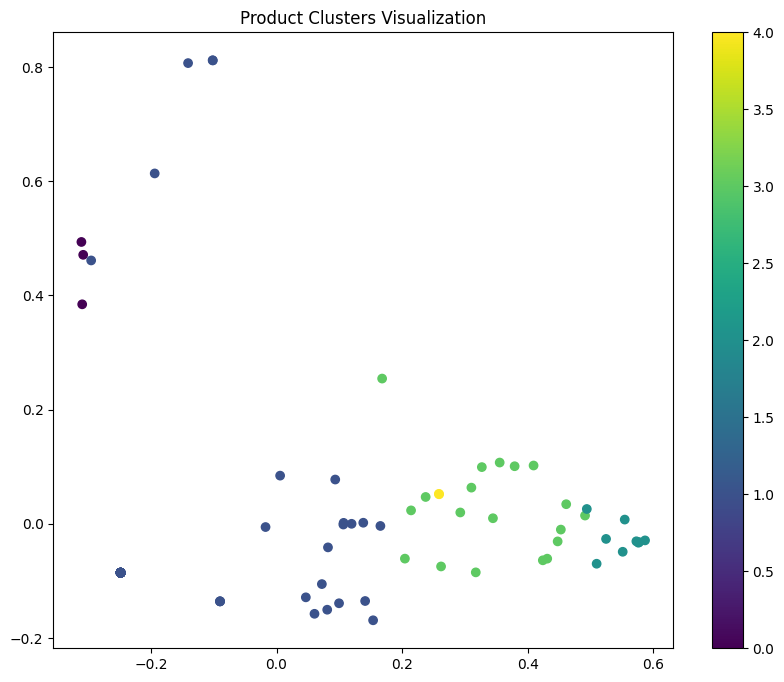


Cluster 0: of, notes, with, and, slightly, note, nishio, taste, nutty, is

Cluster 1: ทฉะ, นค, ยว, ชาเข, matcha, and, tea, of, ไม, ดส

Cluster 2: ทฉะ, ยว, ชาเข, ผง, ______________________________, เกรด, ไม, เข, เลยค, กล

Cluster 3: ทฉะ, ยว, ชาเข, ผง, เข, 100, ไม, กร, เกรด, มล

Cluster 4: intense, ml, ทฉะ, 10, ดซ, teas, ดเหล, แพนด, panda, รสชาต


In [18]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df_without_price['processed_description'] = df_without_price['processed_description'].fillna('')
# 2. Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df_without_price['processed_description'])

# 3. Perform clustering
n_clusters = 5  # adjust based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add cluster labels to dataframe
df_without_price['cluster'] = clusters

# 4. Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Product Clusters Visualization')
plt.colorbar(scatter)
plt.show()

# 5. Analyze top terms per cluster
def get_top_terms_per_cluster(kmeans, feature_names, n_terms=10):
    clusters_terms = {}
    for i in range(n_clusters):
        center = kmeans.cluster_centers_[i]
        top_indices = center.argsort()[-n_terms:][::-1]
        top_terms = [feature_names[j] for j in top_indices]
        clusters_terms[f"Cluster {i}"] = top_terms
    return clusters_terms

top_terms = get_top_terms_per_cluster(kmeans, vectorizer.get_feature_names_out())
for cluster, terms in top_terms.items():
    print(f"\n{cluster}: {', '.join(terms)}")

In [19]:
# from pythainlp.sentiment import sentiment_analyzer

# df_without_price['sentiment'] = df_without_price['description'].apply(lambda x: sentiment_analyzer(x))

In [20]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

def analyze_product_clusters(df, n_clusters=5, max_features=1000):
    """
    Perform product clustering analysis and create interactive visualizations

    Parameters:
    df: DataFrame with 'processed_description' column
    n_clusters: Number of clusters to create
    max_features: Maximum number of features for TF-IDF

    Returns:
    tuple: (DataFrame with clusters, cluster terms dict, plotly figure)
    """
    # Ensure no null values
    df = df.copy()
    df['processed_description'] = df['processed_description'].fillna('')

    # Create TF-IDF vectors
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(df['processed_description'])

    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)

    # Add cluster labels to dataframe
    df['cluster'] = clusters

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(tfidf_matrix.toarray())

    # Add PCA components to dataframe
    df['PCA1'] = reduced_features[:, 0]
    df['PCA2'] = reduced_features[:, 1]

    # Create interactive plot
    fig = px.scatter(
        df,
        x='PCA1',
        y='PCA2',
        color='cluster',
        title='Interactive Product Clusters Visualization',
        labels={'cluster': 'Cluster'},
        color_continuous_scale='viridis',
        hover_data=['processed_description']  # Show description on hover
    )

    # Update layout for better visualization
    fig.update_layout(
        plot_bgcolor='white',
        width=1000,
        height=800,
        title_x=0.5,
        legend_title_text='Cluster',
        xaxis_title='First Principal Component',
        yaxis_title='Second Principal Component'
    )

    # Add gridlines
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

    # Get top terms per cluster
    def get_top_terms_per_cluster(kmeans, feature_names, n_terms=10):
        clusters_terms = {}
        for i in range(n_clusters):
            center = kmeans.cluster_centers_[i]
            top_indices = center.argsort()[-n_terms:][::-1]
            top_terms = [feature_names[j] for j in top_indices]
            clusters_terms[f"Cluster {i}"] = top_terms
        return clusters_terms

    top_terms = get_top_terms_per_cluster(kmeans, vectorizer.get_feature_names_out())

    # Create summary statistics
    cluster_stats = df.groupby('cluster').agg({
        'processed_description': 'count'
    }).rename(columns={'processed_description': 'count'})

    return df, top_terms, fig, cluster_stats

# Example usage:
df_with_clusters, cluster_terms, plot_figure, stats = analyze_product_clusters(df_without_price)

# Display the plot
plot_figure.show()

# Print cluster terms
for cluster, terms in cluster_terms.items():
    print(f"\n{cluster}: {', '.join(terms)}")

# Display cluster statistics
print("\nCluster Statistics:")
print(stats)


Cluster 0: of, notes, with, and, slightly, note, nishio, taste, nutty, is

Cluster 1: ทฉะ, นค, ยว, ชาเข, matcha, and, tea, of, ไม, ดส

Cluster 2: ทฉะ, ยว, ชาเข, ผง, ______________________________, เกรด, ไม, เข, เลยค, กล

Cluster 3: ทฉะ, ยว, ชาเข, ผง, เข, 100, ไม, กร, เกรด, มล

Cluster 4: intense, ml, ทฉะ, 10, ดซ, teas, ดเหล, แพนด, panda, รสชาต

Cluster Statistics:
         count
cluster       
0            3
1           70
2            9
3           19
4            2


In [21]:
from gensim import corpora, models
from gensim.models import LdaModel
from pprint import pprint

# Assuming df_without_price['processed_description'] contains the preprocessed text

# Step 1: Tokenize the text
texts = [[word for word in doc.split()] for doc in df_without_price['processed_description']]

# Step 2: Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Step 3: Train the LDA model
lda_model = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, passes=10, random_state=42)

# Step 4: Print the topics
pprint(lda_model.print_topics(num_topics=5, num_words=10))


[(0,
  '0.036*"มัทฉะ" + 0.016*"/" + 0.014*"ชาเขียว" + 0.010*"1" + 0.009*"3" + '
  '0.008*"มิลลิลิตร" + 0.008*"🌱" + 0.007*""" + 0.007*"Pastel" + 0.007*"ผง"'),
 (1,
  '0.027*"มัทฉะ" + 0.013*"ml" + 0.012*"ผง" + 0.009*"2" + 0.008*"Matcha" + '
  '0.008*"Powder" + 0.008*"ออร์แกนิค" + 0.008*"1" + 0.007*"กรัม" + '
  '0.006*"100%"'),
 (2,
  '0.084*"มัทฉะ" + 0.028*"ชาเขียว" + 0.025*"ผง" + 0.014*"เกรด" + 0.013*"1" + '
  '0.011*"🌱" + 0.010*"✔" + 0.010*"3" + 0.009*"2" + 0.008*"•"'),
 (3,
  '0.029*"มัทฉะ" + 0.018*"ชาเขียว" + 0.012*"Matcha" + 0.011*"and" + '
  '0.011*"เกรด" + 0.010*"of" + 0.009*"tea" + 0.008*"100%" + 0.007*"/" + '
  '0.007*"1"'),
 (4,
  '0.034*"ชาเขียว" + 0.018*"มัทฉะ" + 0.009*"1" + 0.009*"and" + 0.008*"of" + '
  '0.008*"มิลลิลิตร" + 0.007*"note" + 0.006*"ผง" + 0.006*"กรัม" + '
  '0.005*"ช้อนโต๊ะ"')]


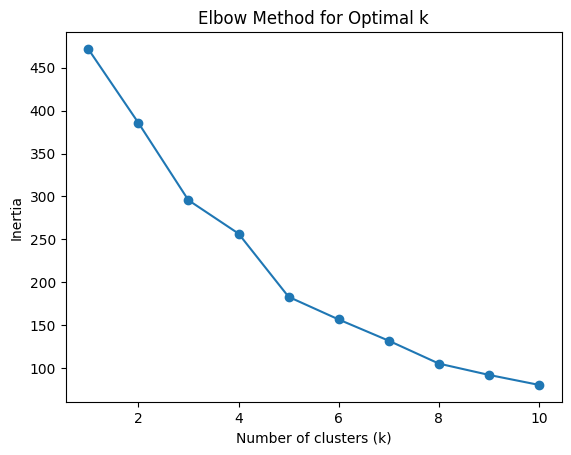

<ipython-input-22-f548e3f6341a>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



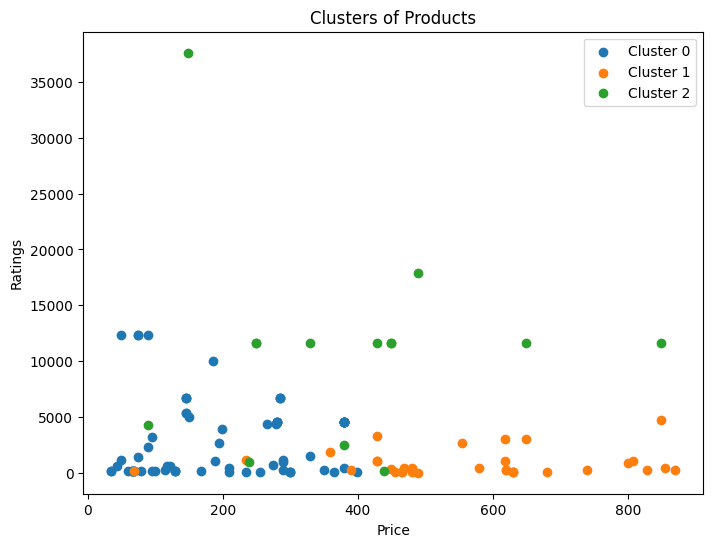

In [22]:
# prompt: cluster df_with_price with price, type, weight, ratings, points and plot it

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_with_price is already defined and preprocessed as in your previous code

# Select features for clustering
features = ['price', 'weight', 'ratings', 'points']  # Add more relevant features

# Handle missing values (replace with mean/median or drop rows)
df_cluster = df_with_price[features].fillna(df_with_price[features].median()) #fillna with median


# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)


# Determine the optimal number of clusters (e.g., using the elbow method)
inertia = []
for k in range(1, 11):  # Test different numbers of clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


# Perform KMeans clustering with the optimal k (replace 3 with the optimal k)
optimal_k = 3 #Example, replace with optimal k from elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_with_price['cluster'] = kmeans.fit_predict(df_scaled)


# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
  plt.scatter(df_with_price[df_with_price['cluster']==cluster]['price'],
              df_with_price[df_with_price['cluster']==cluster]['ratings'],
              label=f'Cluster {cluster}')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.title('Clusters of Products')
plt.legend()
plt.show()

In [23]:
# prompt: fillna with mean and cluster df_with_price with price, type, weight, ratings, sold

# Assuming df_with_price is already defined and preprocessed as in your previous code

# Select features for clustering
features = ['price', 'weight', 'ratings', 'sold']  # Using 'sold' instead of 'points'

# Handle missing values (replace with mean)
for col in features:
    df_with_price[col] = df_with_price[col].fillna(df_with_price[col].mean())

# ... (rest of your clustering code)

<ipython-input-23-0eba30853442>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-24-1fced1da7602>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



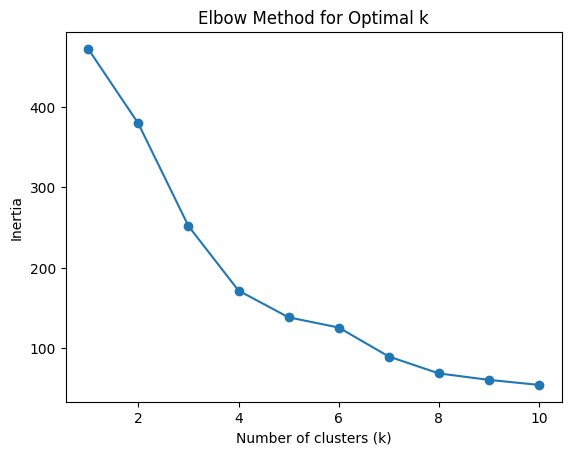

<ipython-input-24-1fced1da7602>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



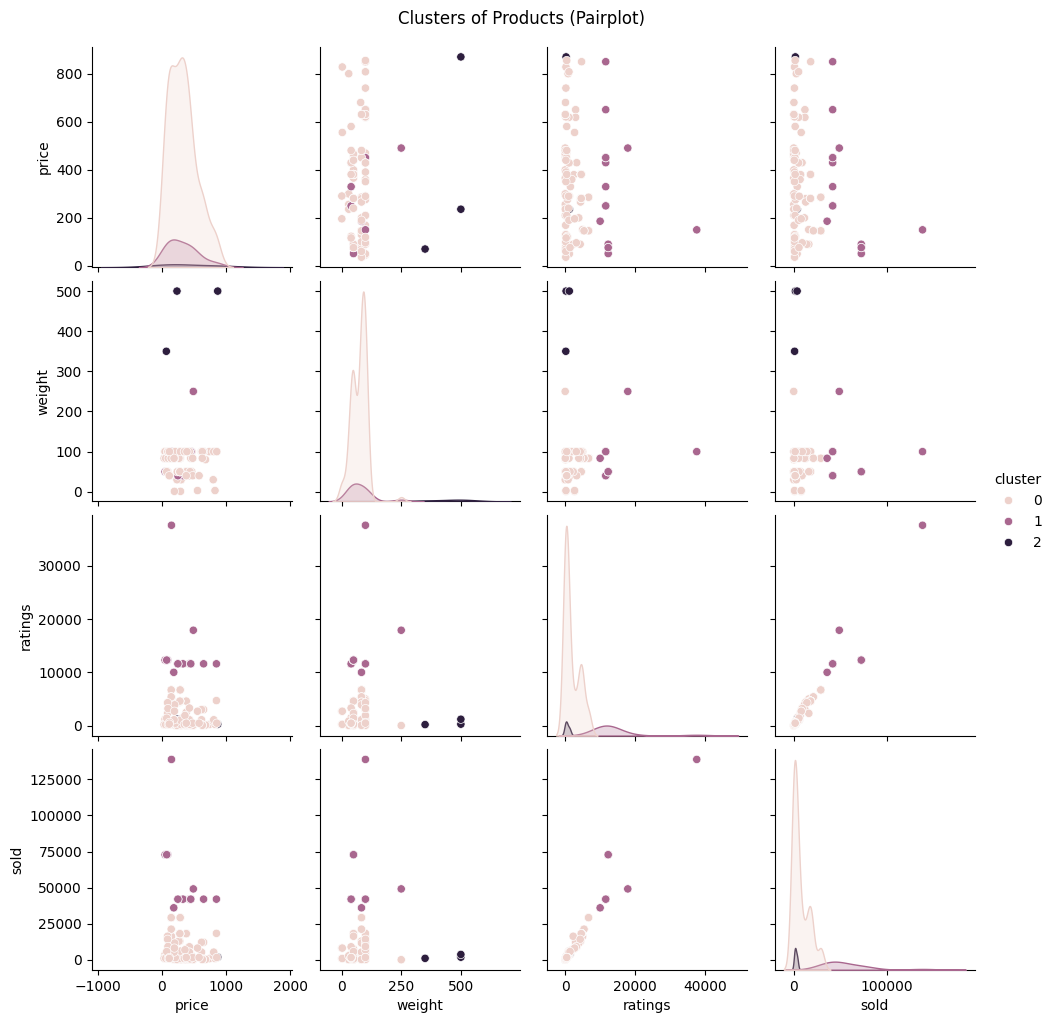

In [24]:
# prompt: cluster df_with_price with price, type, weight, ratings, sold and plot it

# Assuming df_with_price is already defined and preprocessed as in your previous code

# Select features for clustering
features = ['price', 'weight', 'ratings', 'sold']  # Using 'sold' instead of 'points'

# Handle missing values (replace with mean)
for col in features:
    df_with_price[col] = df_with_price[col].fillna(df_with_price[col].mean())

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_with_price[features])

# Determine the optimal number of clusters (e.g., using the elbow method)
inertia = []
for k in range(1, 11):  # Test different numbers of clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Perform KMeans clustering with the optimal k (replace 3 with the optimal k)
optimal_k = 3  # Example, replace with optimal k from elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10) # Increased n_init
df_with_price['cluster'] = kmeans.fit_predict(df_scaled)

# Plot the clusters using all selected features
sns.pairplot(df_with_price, hue='cluster', vars=features)
plt.suptitle('Clusters of Products (Pairplot)', y=1.02) # Add a title for the entire pairplot
plt.show()

In [25]:
# prompt: give an example of each cluster

# Assuming df_with_price and df_without_price are defined as in the provided code

# Example 1: Show the first 5 products in Cluster 0 of df_without_price (textual data)
cluster_0_products = df_without_price[df_without_price['cluster'] == 0].head(5)
print("Example products from Cluster 0 (Textual Data):\n", cluster_0_products[['processed_description', 'processed_review_text']])


# Example 2: Show the first 5 products in Cluster 1 of df_with_price (numerical data)
cluster_1_products = df_with_price[df_with_price['cluster'] == 1].head(5)
print("\nExample products from Cluster 1 (Numerical Data):\n", cluster_1_products[['price', 'weight', 'ratings', 'sold']])


# Example 3: Show the first 5 products in Cluster 2 of df_with_price (numerical data, different features)
cluster_2_products = df_with_price[df_with_price['cluster'] == 2].head(5)
print("\nExample products from Cluster 2 (Numerical Data):\n", cluster_2_products[['price', 'weight', 'ratings', 'sold']])

Example products from Cluster 0 (Textual Data):
                                 processed_description  \
42  Hayate Cafe grade matcha 100% 🌱Taste note Haya...   
64  Nishio 1.0 Origin Nishio Grade Ceremonial Cult...   
70  🌱Taste note Kagayaki Very light and airy sligh...   

                                processed_review_text  
42  [{"review_text":" กลิ่น หอมรสชาติ สโมค อุมามิแ...  
64                                                 []  
70                                                 []  

Example products from Cluster 1 (Numerical Data):
     price      weight  ratings     sold
67  185.0   83.425287  10000.0  36000.0
93  429.0   40.000000  11600.0  42000.0
94  850.0  100.000000  11600.0  42000.0
95  650.0  100.000000  11600.0  42000.0
96  329.0   40.000000  11600.0  42000.0

Example products from Cluster 2 (Numerical Data):
     price  weight  ratings    sold
1   870.0   500.0    274.0  1800.0
50  235.0   500.0   1200.0  3700.0
80   69.0   350.0    195.0  1000.0


In [26]:
# prompt: show the product in cluster 2

# Example 3: Show the first 5 products in Cluster 2 of df_with_price (numerical data, different features)
cluster_2_products = df_with_price[df_with_price['cluster'] == 2].head(5)
cluster_2_products

,product_name,price_range,ratings,sold,favorite,shop_name,points,product_count,reply_rates,age,...,reviews,price,option,review_text,imgs,imgs-srcset,weight,type,price_per_weight,cluster
1,[แพนด้าที] ผงชาเขียวมัทฉะ 100% Intense เข้มข้น...,870.0,274.0,1800.0,231,Panda-teas,27300.0,24,0.87,8 ปี ที่ผ่านมา,...,NaN,870.0,[],NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN,500.0,NaN,1.740000,2
50,🔥❤️ Matchaชาเขียวมัทฉะ ชาเขียวพร้อมชง ชาเขียว...,235.0,1200.0,3700.0,495,Yaji99,16200.0,56,0.69,3 ปี ที่ผ่านมา,...,NaN,235.0,"[{""option"":""500g""}]",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN,500.0,NaN,0.470000,2
80,[St.Coco Cafe]แปรงชงชาเรซิ่น สำหรัยชงชาเขียวมั...,99.0,195.0,1000.0,249,St Coco Cafe,21400.0,160,0.80,12 เดือน ที่ผ่านมา,...,NaN,69.0,"[{""option"":""ถ้วยแก้ว#350 มล.""}]",NaN,"[{""imgs"":"""",""imgs-srcset"":""https://down-th.img...",NaN,350.0,NaN,0.197143,2


In [27]:
# prompt: generate pricer per weight of each cluster and average sold, average weight

# Calculate price per weight and other statistics for each cluster
cluster_stats = df_with_price.groupby('cluster').agg(
    average_price=('price', 'mean'),
    average_weight=('weight', 'mean'),
    average_sold=('sold', 'mean')
)

# Calculate price per weight
cluster_stats['price_per_weight'] = cluster_stats['average_price'] / cluster_stats['average_weight']

cluster_stats

,average_price,average_weight,average_sold,price_per_weight
cluster,,,,
0,325.010000,73.007586,7107.780000,4.451729
1,317.933333,79.561686,56740.000000,3.996061
2,391.333333,450.000000,2166.666667,0.869630


In [28]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2024-12-08 13:40:15--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-12-08 13:40:15--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.03s   

2024-12-08 13:40:15 (2.73 MB/s) - ‘t

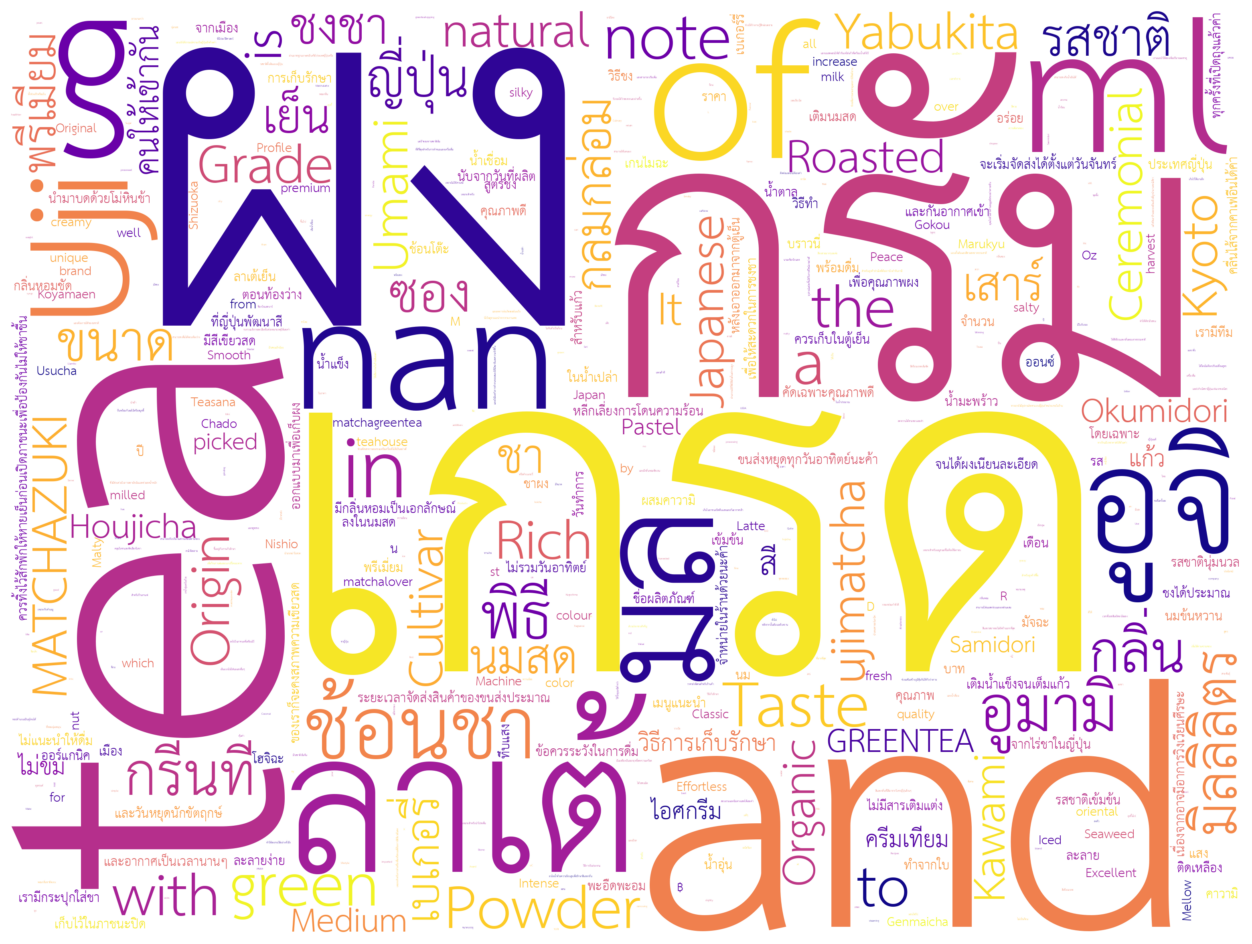

In [29]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_stopwords

# Example Thai words (replace with your actual text)
words

# Add words to remove from the cloud
custom_stopwords = set(thai_stopwords()).union({"Matcha", "มัทฉะ", "ชาเขียว"})

# Generate the word cloud
wordcloud = WordCloud(
    font_path='thsarabunnew-webfont.ttf',  # Specify Thai font path
    stopwords=custom_stopwords,           # Add custom stopwords
    relative_scaling=0.3,
    min_font_size=1,
    background_color="white",
    width=1024,
    height=768,
    max_words=500,                        # Limit number of words
    colormap='plasma',
    scale=3,
    font_step=4,
    collocations=False,
    regexp=r"[ก-๙a-zA-Z']+",              # Tokenize using this regex
    margin=2
).generate(' '.join(words))

# Plot the word cloud
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.show()


In [30]:
# prompt: get data from https://raw.githubusercontent.com/xb1g/chatasci/refs/heads/main/Shopee%20Matcha%20Search%20Results%20(1).csv, url encode it

import pandas as pd
import requests
from urllib.parse import urlencode

def get_and_process_data(url):
    try:
        # URL encode the URL if needed
        encoded_url = urlencode({'url': url})
        # Fetch data from the URL
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes

        # Read CSV data into a pandas DataFrame
        df = pd.read_csv(url)

        return df
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None
    except pd.errors.EmptyDataError:
        print("Error: The CSV file is empty.")
        return None
    except pd.errors.ParserError:
        print("Error: Unable to parse the CSV file.")
        return None


# Example usage:
url = "https://raw.githubusercontent.com/xb1g/chatasci/refs/heads/main/Shopee%20Matcha%20Search%20Results%20(1).csv"
df_data = get_and_process_data(url)

if df_data is not None:
    # Now you can work with the df_data DataFrame
    # ... (rest of your code using df_data) ...
    print(df_data.head()) #print first 5 rows

  web-scraper-order                              web-scraper-start-url  \
0      1731387704-1  https://shopee.co.th/search?gad_source=1&gclid...   
1      1731387704-2  https://shopee.co.th/search?gad_source=1&gclid...   
2      1731387704-3  https://shopee.co.th/search?gad_source=1&gclid...   
3      1731387704-4  https://shopee.co.th/search?gad_source=1&gclid...   
4      1731387704-5  https://shopee.co.th/search?gad_source=1&gclid...   

                                    banner-image-src  \
0                                                NaN   
1  https://down-th.img.susercontent.com/file/th-1...   
2  https://down-th.img.susercontent.com/file/th-1...   
3  https://down-th.img.susercontent.com/file/th-1...   
4  https://down-th.img.susercontent.com/file/th-1...   

                                        product_name price         ratings  \
0  🔥ส่งไว ส่งฟรี 👍Truvitar Pea Protein Green Tea ...   980  ขายแล้ว 1 ชิ้น   
1  [2 กล่อง] Equal Cafe อิควล คาเฟ่ ชาเขียวหญ้าหว...   186  ขา

In [31]:
import pandas as pd
import re

def convert_thai_number(text):
    """
    Converts Thai textual numbers like 'พัน' or 'หมื่น' into numeric equivalents.
    """
    text = str(text)  # Ensure the input is a string

    # Replace Thai multipliers with their numeric values
    if 'พัน' in text:
        text = text.replace('พัน', '').strip()
        return float(text) * 1000 if text else 1000
    elif 'หมื่น' in text:
        text = text.replace('หมื่น', '').strip()
        return float(text) * 10000 if text else 10000
    elif 'ล้าน' in text:
        text = text.replace('ล้าน', '').strip()
        return float(text) * 1000000 if text else 1000000

    return text  # Return unchanged if no Thai multipliers are found

def preprocess_data(df):
    # Remove "ขายแล้ว" and "ชิ้น" from the 'sold' column
    df['sold'] = df['sold'].astype(str).str.replace(r'ขายแล้ว|ชิ้น', '', regex=True).str.strip()

    # Handle Thai textual numbers in 'sold' and convert to numeric
    df['sold'] = df['sold'].apply(convert_thai_number)
    df['sold'] = pd.to_numeric(df['sold'], errors='coerce')

    # Remove 'web-scraper-order' column if it exists
    if 'web-scraper-order' in df.columns:
        df = df.drop('web-scraper-order', axis=1)

    # One-hot encode the 'banners' column
    if 'banners' in df.columns:
        df = pd.get_dummies(df, columns=['banners'], prefix='banner')

    # Clean and convert 'price' column to numeric
    if 'price' in df.columns:
        df['price'] = df['price'].astype(str).str.replace('฿', '').str.strip()
        df['price'] = pd.to_numeric(df['price'], errors='coerce')

    return df

# Assuming df_data is your DataFrame
# Replace 'your_dataframe.csv' with the actual file path if loading from a file.
# df_data = pd.read_csv('your_dataframe.csv')

# Preprocess the data
df_without_price = preprocess_data(df_data)

# Example: Print the preprocessed DataFrame
print(df_without_price.head())


                               web-scraper-start-url  \
0  https://shopee.co.th/search?gad_source=1&gclid...   
1  https://shopee.co.th/search?gad_source=1&gclid...   
2  https://shopee.co.th/search?gad_source=1&gclid...   
3  https://shopee.co.th/search?gad_source=1&gclid...   
4  https://shopee.co.th/search?gad_source=1&gclid...   

                                    banner-image-src  \
0                                                NaN   
1  https://down-th.img.susercontent.com/file/th-1...   
2  https://down-th.img.susercontent.com/file/th-1...   
3  https://down-th.img.susercontent.com/file/th-1...   
4  https://down-th.img.susercontent.com/file/th-1...   

                                        product_name  price         ratings  \
0  🔥ส่งไว ส่งฟรี 👍Truvitar Pea Protein Green Tea ...  980.0  ขายแล้ว 1 ชิ้น   
1  [2 กล่อง] Equal Cafe อิควล คาเฟ่ ชาเขียวหญ้าหว...  186.0  ขายแล้ว 3 ชิ้น   
2  ชาเขียว🌱  มัทฉะ ลาเต้ กิฟฟารีน เกรดพรีเมี่ยม ช...  176.0             5.0   
3  🌈🇹🇭 STA

In [32]:
df_data['sold'].describe()

,sold
count,978.000000
mean,1770.170757
std,7037.791859
min,1.000000
25%,14.000000
50%,112.500000
75%,792.250000
max,138800.000000


In [33]:
# prompt: make price column number then plot the df_data based on price and sold using plotly, sort by price

import plotly.express as px

# Assuming df_data is already defined and preprocessed as in the previous code

# Convert the 'price' column to numeric, handling errors
df_data['price'] = pd.to_numeric(df_data['price'], errors='coerce')

# Sort the DataFrame by price
df_data_sorted = df_data.sort_values('price')

# Create the Plotly plot
fig = px.scatter(df_data_sorted, x='price', y='sold', title='Price vs. Sold (Sorted by Price)',
                 labels={'price': 'Price (฿)', 'sold': 'Sold'})

fig.show()

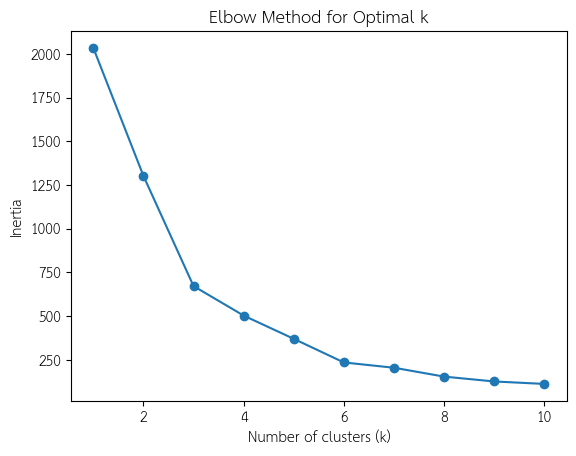

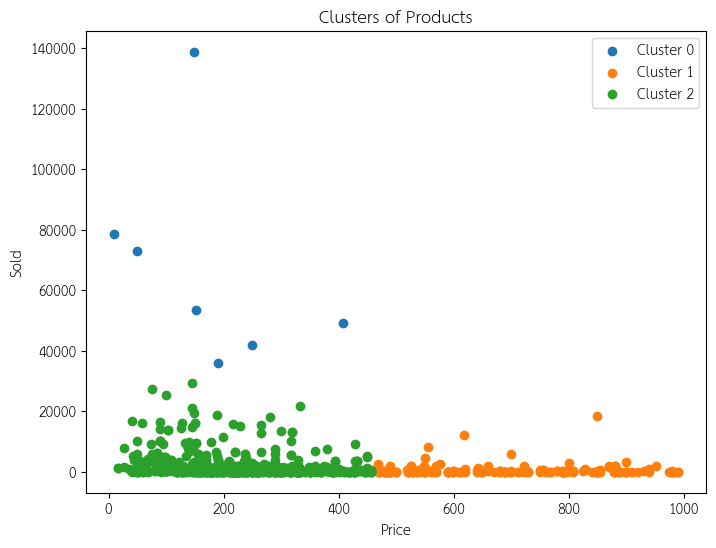

In [34]:
# prompt: cluster the df_data

# Assuming df_data is already defined and preprocessed as in the previous code

# Select features for clustering
features = ['price', 'sold']  # Using 'sold' instead of 'points'


# Handle missing values (replace with mean)
for col in features:
    df_data[col] = df_data[col].fillna(df_data[col].mean())

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_data[features])

# Determine the optimal number of clusters (e.g., using the elbow method)
inertia = []
for k in range(1, 11):  # Test different numbers of clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Perform KMeans clustering with the optimal k (replace 3 with the optimal k)
optimal_k = 3  # Example, replace with optimal k from elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10) # Increased n_init
df_data['cluster'] = kmeans.fit_predict(df_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
  plt.scatter(df_data[df_data['cluster']==cluster]['price'],
              df_data[df_data['cluster']==cluster]['sold'],
              label=f'Cluster {cluster}')
plt.xlabel('Price')
plt.ylabel('Sold')
plt.title('Clusters of Products')
plt.legend()
plt.show()

<ipython-input-35-e0876464bdf4>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



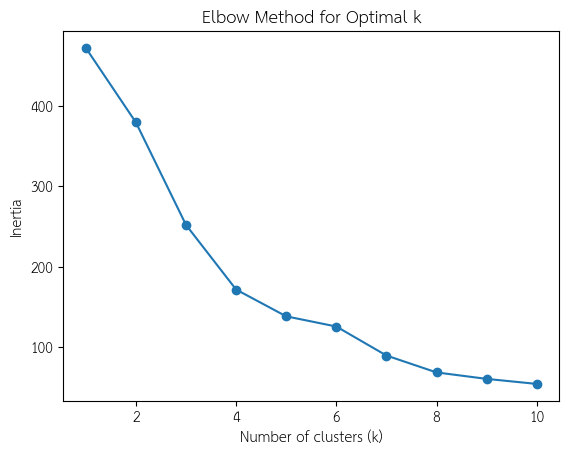

<ipython-input-35-e0876464bdf4>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



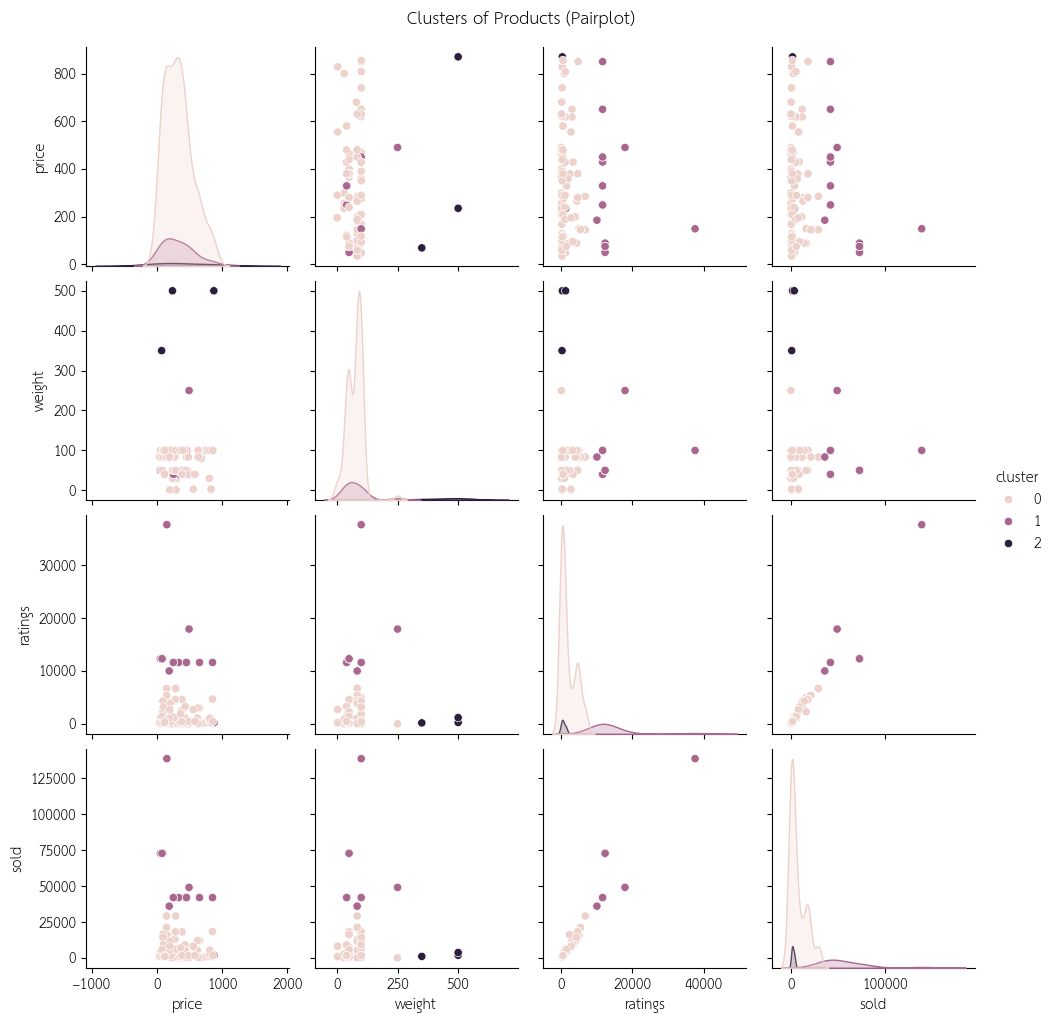

In [35]:
# prompt: cluster df_with_price and plot it

# Assuming df_with_price is already defined and preprocessed as in your previous code

# Select features for clustering
features = ['price', 'weight', 'ratings', 'sold']  # Using 'sold' instead of 'points'

# Handle missing values (replace with mean)
for col in features:
    df_with_price[col] = df_with_price[col].fillna(df_with_price[col].mean())

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_with_price[features])

# Determine the optimal number of clusters (e.g., using the elbow method)
inertia = []
for k in range(1, 11):  # Test different numbers of clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Perform KMeans clustering with the optimal k (replace 3 with the optimal k)
optimal_k = 3  # Example, replace with optimal k from elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10) # Increased n_init
df_with_price['cluster'] = kmeans.fit_predict(df_scaled)

# Plot the clusters using all selected features
sns.pairplot(df_with_price, hue='cluster', vars=features)
plt.suptitle('Clusters of Products (Pairplot)', y=1.02) # Add a title for the entire pairplot
plt.show()

In [36]:
# prompt: combine all the clusters and make a center of each cluster

import pandas as pd
import numpy as np

def combine_and_center_clusters(df, cluster_column='cluster', features=None):
    """
    Combines all clusters in a DataFrame and calculates the center of each cluster.

    Args:
        df: The input DataFrame with a cluster column.
        cluster_column: The name of the column containing cluster assignments.
        features: A list of feature column names to use for center calculation.
                  If None, all numerical columns are used.

    Returns:
        A DataFrame containing the cluster centers.
    """

    if features is None:
        features = df.select_dtypes(include=np.number).columns

    cluster_centers = df.groupby(cluster_column)[features].mean()
    return cluster_centers


# Example usage (assuming 'df_with_price' is your DataFrame and 'cluster' is the cluster column):

#Get cluster centers for numerical features
cluster_centers_numerical = combine_and_center_clusters(df_with_price)
print("Cluster Centers (Numerical Features):\n", cluster_centers_numerical)


#Get cluster centers for specific features
selected_features = ['price', 'weight', 'ratings', 'sold']
cluster_centers_selected = combine_and_center_clusters(df_with_price, features=selected_features)
print("\nCluster Centers (Selected Features):\n", cluster_centers_selected)

Cluster Centers (Numerical Features):
          price_range       ratings          sold  favorite        points  \
cluster                                                                    
0         337.860000   1826.830000   7107.780000    208.58  33573.730000   
1         314.933333  13833.333333  56740.000000     16.60  66113.333333   
2         401.333333    556.333333   2166.666667    325.00  21633.333333   

         reply_rates     followers       price  imgs-srcset      weight  \
cluster                                                                   
0           0.738500  37517.130000  325.010000          NaN   73.007586   
1           0.926667  68660.000000  317.933333          NaN   79.561686   
2           0.786667   9966.666667  391.333333          NaN  450.000000   

         price_per_weight  cluster  
cluster                             
0               18.538502      0.0  
1                5.403189      1.0  
2                0.802381      2.0  

Cluster Centers (S

In [37]:
# prompt: plot price per weight vs sold, using df_with_price, and show as text as well

import plotly.express as px

# Calculate price per weight
df_with_price['price_per_weight'] = df_with_price['price'] / df_with_price['weight']

# Create the Plotly plot
fig = px.scatter(df_with_price, x='price_per_weight', y='sold',
                 title='Price per Weight vs. Sold',
                 labels={'price_per_weight': 'Price per Weight', 'sold': 'Sold'})

fig.show()

# Print the price per weight vs sold data
print(df_with_price[['price_per_weight', 'sold']])

<ipython-input-37-9290abb30ca1>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     price_per_weight    sold
1               1.740  1800.0
3               2.090   232.0
5               0.440  2000.0
9               8.225  3800.0
11              6.200   794.0
..                ...     ...
208             2.875   904.0
212            12.000  1600.0
214            14.500  1600.0
216             9.500  1600.0
217             8.550  1600.0

[118 rows x 2 columns]


In [38]:
# prompt: plot price per weight vs sold, using df_with_price, make clusters and describe each of the clusters

import plotly.express as px

# Calculate price per weight
df_with_price['price_per_weight'] = df_with_price['price'] / df_with_price['weight']

# Create the Plotly plot
fig = px.scatter(df_with_price, x='price_per_weight', y='sold', color='cluster',
                 title='Price per Weight vs. Sold',
                 labels={'price_per_weight': 'Price per Weight', 'sold': 'Sold'})

fig.show()

# Describe each cluster
cluster_description = df_with_price.groupby('cluster').agg(
    {'price_per_weight': ['mean', 'std'], 'sold': ['mean', 'std']}
)
cluster_description

<ipython-input-38-f415b330e2fb>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



price_per_weight                     sold              
                    mean        std          mean           std
cluster                                                        
0              14.244014  46.723054   7107.780000   8672.701803
1               4.456504   3.127285  56740.000000  26715.693622
2               0.802381   0.823383   2166.666667   1386.842938

In [39]:
# prompt: violin plot product by weight from df_with_price and price with plotly

import plotly.express as px

# Assuming df_with_price is already defined and contains 'product', 'weight', and 'price' columns
# and 'cluster' column from previous KMeans clustering.

fig = px.violin(df_with_price,
                y="price",
                x="weight",
                color="cluster",
                box=True, # add box plot inside the violin
                points="all", # show all points
                hover_data="product_name") #add hover data

fig.show()

In [40]:
# prompt: plot df_with_price with price_per_weight and sold and product_name

import plotly.express as px

fig = px.scatter(df_with_price, x='price_per_weight', y='sold', color='product_name',)
fig.show()